# Análisis Exploratorio de Víctimas del Conflicto Armado

Este notebook contiene un análisis exploratorio del dataset de víctimas del conflicto armado en Colombia.

## Importación de Librerías

Importamos las librerías necesarias para el análisis de datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
sns.set(font_scale=1.2)  # Seaborn sets the style automatically
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-v0_8')  # or another valid seaborn style
sns.set(font_scale=1.2)

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Carga del Dataset

Cargamos el dataset de víctimas del conflicto armado desde el archivo CSV.

In [23]:
# Define the relative path to the data file
data_path = '../data/raw/Cifras_de_V_ctimas_por_Hechos_Departamental_20250416.csv'

# Load the dataset
try:
    # Attempt to read with UTF-8 encoding first
    df = pd.read_csv(data_path, encoding='utf-8') 
except UnicodeDecodeError:
    try:
        # Fallback to Latin-1 encoding if UTF-8 fails
        df = pd.read_csv(data_path, encoding='latin1') 
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        df = None # Indicate failure by setting df to None

# Verificar si el dataset se cargó correctamente
if df is not None:
    print(f"Dataset cargado exitosamente. Dimensiones: {df.shape}")
else:
    print("Error al cargar el dataset. Por favor, verifica la ruta y la codificación del archivo.")

Dataset cargado exitosamente. Dimensiones: (2495103, 17)


## Primeras Filas del Dataset

Visualizamos las primeras filas del dataset para entender su estructura.

In [8]:
# Mostrar las primeras filas del dataset
if df is not None:
    print("Primeras 5 filas del dataset:")
    display(df.head())
else:
    print("No se puede mostrar las primeras filas porque el dataset no se cargó correctamente.")

Primeras 5 filas del dataset:


,FECHA_CORTE,NOM_RPT,COD_PAIS,PAIS,COD_ESTADO_DEPTO,ESTADO_DEPTO,PARAM_HECHO,HECHO,SEXO,ETNIA,DISCAPACIDAD,CICLO_VITAL,PER_OCU,PER_DECLA,PER_UBIC,PER_SA,EVENTOS
0,2022/03/31 00:00:00.000000000,"REPORTE VICTIMAS POR HECHO, CIFRA DEPARTAMENTA...",48,COLOMBIA,13,Bolivar,5,Desplazamiento forzado,Hombre,Gitano (RROM) (Acreditado RA),Ninguna,entre 18 y 28,3.0,4.0,3.0,3.0,3.0
1,2022/02/28 00:00:00.000000000,"REPORTE VICTIMAS POR HECHO, CIFRA DEPARTAMENTA...",48,COLOMBIA,20,Cesar,5,Desplazamiento forzado,Mujer,Raizal del Archipielago de San Andres y Provid...,Multiple,entre 61 y 100,1.0,NaN,NaN,NaN,1.0
2,2022/04/30 00:00:00.000000000,"REPORTE VICTIMAS POR HECHO, CIFRA DEPARTAMENTA...",48,COLOMBIA,18,Caqueta,5,Desplazamiento forzado,Hombre,Gitano (RROM) (Acreditado RA),Ninguna,entre 29 y 60,2.0,NaN,NaN,NaN,2.0
3,2022/05/31 00:00:00.000000000,"REPORTE VICTIMAS POR HECHO, CIFRA DEPARTAMENTA...",48,COLOMBIA,95,Guaviare,5,Desplazamiento forzado,Hombre,Negro(a) o Afrocolombiano(a),Fisica,entre 61 y 100,11.0,7.0,4.0,4.0,12.0
4,2022/04/30 00:00:00.000000000,"REPORTE VICTIMAS POR HECHO, CIFRA DEPARTAMENTA...",48,COLOMBIA,18,Caqueta,2,Amenaza,Hombre,Indigena (Acreditado RA),Por Establecer,entre 12 y 17,1.0,1.0,1.0,1.0,1.0


## Información del Dataset

Exploramos la información general del dataset, incluyendo tipos de datos y valores no nulos.

In [9]:
# Mostrar información del dataset
if df is not None:
    print("Información del Dataset:")
    df.info()
else:
    print("No se puede mostrar la información porque el dataset no se cargó correctamente.")

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495103 entries, 0 to 2495102
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FECHA_CORTE       object 
 1   NOM_RPT           object 
 2   COD_PAIS          int64  
 3   PAIS              object 
 4   COD_ESTADO_DEPTO  int64  
 5   ESTADO_DEPTO      object 
 6   PARAM_HECHO       int64  
 7   HECHO             object 
 8   SEXO              object 
 9   ETNIA             object 
 10  DISCAPACIDAD      object 
 11  CICLO_VITAL       object 
 12  PER_OCU           float64
 13  PER_DECLA         float64
 14  PER_UBIC          float64
 15  PER_SA            float64
 16  EVENTOS           float64
dtypes: float64(5), int64(3), object(9)
memory usage: 323.6+ MB


## Valores Únicos por Columna

A continuación, exploraremos los valores únicos presentes en cada columna del dataset. Esto nos permitirá entender mejor las categorías y la diversidad de datos con los que estamos trabajando, lo cual es fundamental para un análisis más profundo del conflicto armado.

In [ ]:
# Función para mostrar los valores únicos de cada columna de manera visualmente atractiva
def mostrar_valores_unicos(dataframe, columnas_excluidas=['FECHA_CORTE', 'PER_OCU', 'PER_DECLA', 'PER_UBIC', 'PER_SA', 'EVENTOS']):
    # Crear un diccionario para almacenar los valores únicos de cada columna
    valores_unicos = {}
    
    # Obtener los valores únicos para cada columna y verificar que no sean nulos
    for columna in dataframe.columns:
        if columna not in columnas_excluidas:
            valores = dataframe[columna].dropna().unique()
            if len(valores) > 0:  # Only add if there are non-null values
                valores_unicos[columna] = valores
    
    # Print total number of columns being displayed
    print(f"\nMostrando valores únicos para {len(valores_unicos)} columnas de un total de {len(dataframe.columns)} columnas\n")
    
    # Mostrar los valores únicos de manera visualmente atractiva
    for columna, valores in valores_unicos.items():
        print(f"\n{'=' * 80}\n{columna} ({len(valores)} valores únicos)\n{'=' * 80}")
        
        # Limitar la cantidad de valores a mostrar si hay demasiados
        max_valores = 20
        if len(valores) > max_valores:
            print(f"Mostrando los primeros {max_valores} valores (de un total de {len(valores)}):\n")
            valores_mostrar = valores[:max_valores]
        else:
            valores_mostrar = valores
        
        # Formatear los valores para una mejor visualización
        for i, valor in enumerate(valores_mostrar):
            print(f"  {i+1}. {valor}")

# Mostrar los valores únicos del dataset
if df is not None:
    mostrar_valores_unicos(df)
else:
    print("No se pueden mostrar los valores únicos porque el dataset no se cargó correctamente.")


Mostrando valores únicos para 11 columnas de un total de 17 columnas


NOM_RPT (2 valores únicos)
  1. REPORTE VICTIMAS POR HECHO, CIFRA DEPARTAMENTAL (SEXO, ETNIA, DISCAPACIDAD, CICLO_VITAL) personas: (Ocurrencia, DeclaraciÃ³n, UbicaciÃ³n, Sujetos AtenciÃ³n y Eventos)
  2. REPORTE VICTIMAS POR HECHO, CIFRA DEPARTAMENTAL (SEXO, ETNIA, DISCAPACIDAD, CICLO_VITAL) personas: (Ocurrencia, Declaraciï¿½n, Ubicaciï¿½n, Sujetos Atenciï¿½n y Eventos)

COD_PAIS (1 valores únicos)
  1. 48

PAIS (1 valores únicos)
  1. COLOMBIA

COD_ESTADO_DEPTO (34 valores únicos)
Mostrando los primeros 20 valores (de un total de 34):

  1. 13
  2. 20
  3. 18
  4. 95
  5. 19
  6. 25
  7. 99
  8. 66
  9. 44
  10. 50
  11. 52
  12. 17
  13. 68
  14. 8
  15. 54
  16. 85
  17. 70
  18. 27
  19. 76
  20. 86

ESTADO_DEPTO (36 valores únicos)
Mostrando los primeros 20 valores (de un total de 36):

  1. Bolivar
  2. Cesar
  3. Caqueta
  4. Guaviare
  5. Cauca
  6. Cundinamarca
  7. Vichada
  8. Risaralda
  9. La Guajira


## Estadísticas Descriptivas

Calculamos estadísticas descriptivas para entender la distribución de los datos.

In [10]:
# Calcular estadísticas descriptivas
if df is not None:
    print("Estadísticas Descriptivas:")
    display(df.describe(include='all'))
else:
    print("No se pueden calcular estadísticas descriptivas porque el dataset no se cargó correctamente.")

Estadísticas Descriptivas:


,FECHA_CORTE,NOM_RPT,COD_PAIS,PAIS,COD_ESTADO_DEPTO,ESTADO_DEPTO,PARAM_HECHO,HECHO,SEXO,ETNIA,DISCAPACIDAD,CICLO_VITAL,PER_OCU,PER_DECLA,PER_UBIC,PER_SA,EVENTOS
count,2495103,2495103,2495103.0,2495103,2.495103e+06,2495103,2.495103e+06,2495103,2495103,2495103,2495103,2495103,1.969962e+06,1.916516e+06,2.025777e+06,1.927046e+06,1.969962e+06
unique,39,2,NaN,1,NaN,36,NaN,21,5,11,8,9,NaN,NaN,NaN,NaN,NaN
top,2024/02/29 00:00:00.000000000,"REPORTE VICTIMAS POR HECHO, CIFRA DEPARTAMENTA...",NaN,COLOMBIA,NaN,SIN DEFINIR,NaN,Desplazamiento forzado,Hombre,Ninguna,Ninguna,entre 29 y 60,NaN,NaN,NaN,NaN,NaN
freq,118198,2431303,NaN,2495103,NaN,130139,NaN,586138,1213256,980594,932184,645780,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.0,NaN,4.274553e+01,NaN,6.632834e+00,NaN,NaN,NaN,NaN,NaN,2.407323e+02,2.523866e+02,2.284389e+02,1.938493e+02,2.667756e+02
std,NaN,NaN,0.0,NaN,2.986914e+01,NaN,4.546079e+00,NaN,NaN,NaN,NaN,NaN,3.204399e+03,3.186647e+03,3.015645e+03,2.443128e+03,3.590440e+03
min,NaN,NaN,48.0,NaN,0.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,NaN,NaN,48.0,NaN,1.700000e+01,NaN,3.000000e+00,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,NaN,NaN,48.0,NaN,4.400000e+01,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
75%,NaN,NaN,48.0,NaN,7.000000e+01,NaN,9.000000e+00,NaN,NaN,NaN,NaN,NaN,1.400000e+01,1.500000e+01,1.400000e+01,1.300000e+01,1.500000e+01


## Valores Nulos

Analizamos la presencia de valores nulos en el dataset.

In [11]:
# Verificar valores nulos
if df is not None:
    # Calcular el número de valores nulos por columna
    nulos = df.isnull().sum()
    
    # Calcular el porcentaje de valores nulos
    porcentaje_nulos = (nulos / len(df)) * 100
    
    # Crear un DataFrame con la información de valores nulos
    info_nulos = pd.DataFrame({
        'Valores Nulos': nulos,
        'Porcentaje (%)': porcentaje_nulos
    })
    
    print("Análisis de Valores Nulos:")
    display(info_nulos)
else:
    print("No se puede analizar valores nulos porque el dataset no se cargó correctamente.")

Análisis de Valores Nulos:


,Valores Nulos,Porcentaje (%)
FECHA_CORTE,0,0.000000
NOM_RPT,0,0.000000
COD_PAIS,0,0.000000
PAIS,0,0.000000
COD_ESTADO_DEPTO,0,0.000000
ESTADO_DEPTO,0,0.000000
PARAM_HECHO,0,0.000000
HECHO,0,0.000000
SEXO,0,0.000000
ETNIA,0,0.000000


## Distribución de Hechos Victimizantes

Analizamos la distribución de los diferentes tipos de hechos victimizantes.

Distribución de Hechos Victimizantes:


,Frecuencia,Porcentaje (%)
HECHO,,
Desplazamiento forzado,586138,23.491535
Amenaza,348212,13.955817
Homicidio,258202,10.348350
Acto terrorista / Atentados / Combates / Enfrentamientos / Hostigamientos,162848,6.526705
Desaparición forzada,156428,6.269401
Perdida de Bienes Muebles o Inmuebles,144017,5.771986
Delitos contra la libertad y la integridad sexual en desarrollo del conflicto armado,126391,5.065562
Lesiones Personales Fisicas,97853,3.921802
Secuestro,88594,3.550715


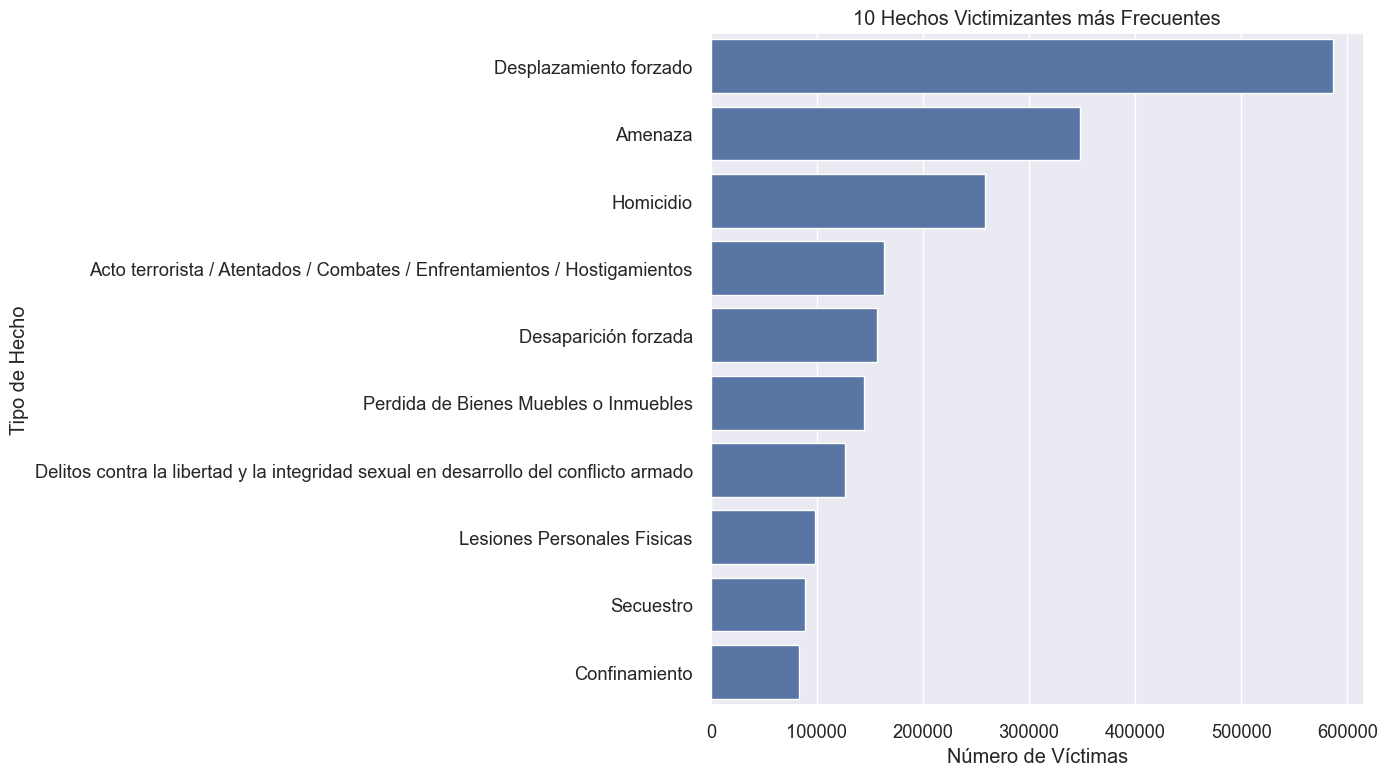

In [15]:
# Analizar la distribución de hechos victimizantes
if df is not None:
    # Contar frecuencia de cada tipo de hecho
    hechos_count = df['HECHO'].value_counts()
    
    # Calcular porcentaje
    hechos_percent = (hechos_count / len(df)) * 100
    
    # Crear DataFrame con la información
    hechos_df = pd.DataFrame({
        'Frecuencia': hechos_count,
        'Porcentaje (%)': hechos_percent
    })
    
    print("Distribución de Hechos Victimizantes:")
    display(hechos_df)
    
    # Visualizar los 10 hechos más frecuentes
    plt.figure(figsize=(14, 8))
    sns.barplot(x=hechos_count.values[:10], y=hechos_count.index[:10])
    plt.title('10 Hechos Victimizantes más Frecuentes')
    plt.xlabel('Número de Víctimas')
    plt.ylabel('Tipo de Hecho')
    plt.tight_layout()
    plt.show()
else:
    print("No se puede analizar la distribución de hechos porque el dataset no se cargó correctamente.")

## Distribución por Departamento

Analizamos la distribución geográfica de las víctimas por departamento.

Distribución de Víctimas por Departamento:


,Frecuencia,Porcentaje (%)
ESTADO_DEPTO,,
SIN DEFINIR,130139,5.215777
"Bogota, D.C.",129777,5.201268
Antioquia,128224,5.139026
Cauca,121094,4.853267
Nariño,121092,4.853186
Valle del Cauca,119759,4.799762
Choco,96878,3.882725
Putumayo,95944,3.845292
Bolivar,88842,3.560655


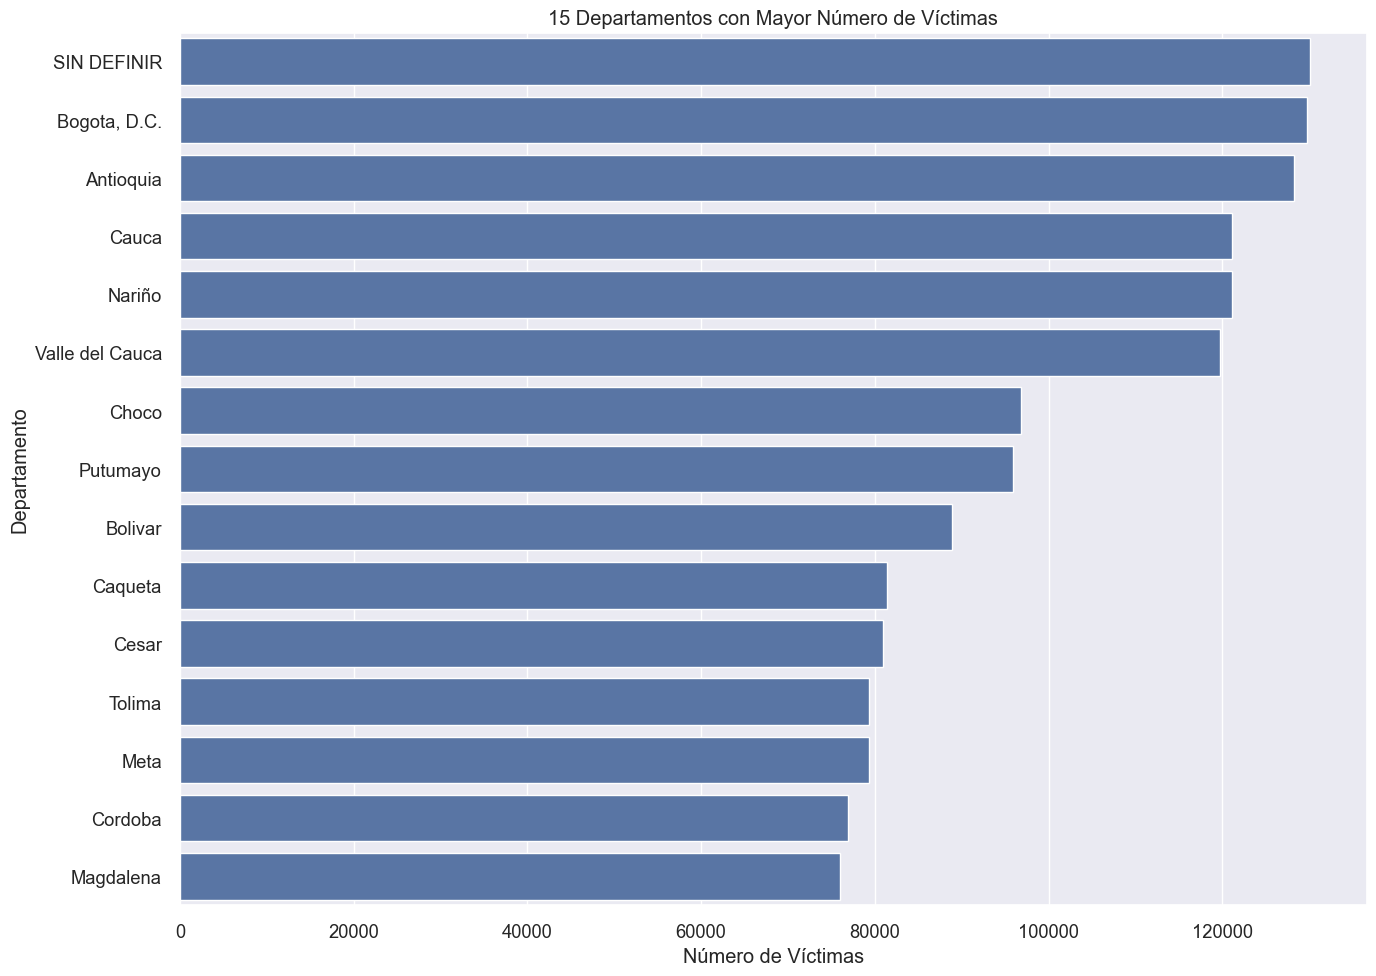

In [14]:
# Analizar la distribución por departamento
if df is not None:
    # Contar frecuencia por departamento
    depto_count = df['ESTADO_DEPTO'].value_counts()
    
    # Calcular porcentaje
    depto_percent = (depto_count / len(df)) * 100
    
    # Crear DataFrame con la información
    depto_df = pd.DataFrame({
        'Frecuencia': depto_count,
        'Porcentaje (%)': depto_percent
    })
    
    print("Distribución de Víctimas por Departamento:")
    display(depto_df)
    
    # Visualizar los 15 departamentos con más víctimas
    plt.figure(figsize=(14, 10))
    sns.barplot(x=depto_count.values[:15], y=depto_count.index[:15])
    plt.title('15 Departamentos con Mayor Número de Víctimas')
    plt.xlabel('Número de Víctimas')
    plt.ylabel('Departamento')
    plt.tight_layout()
    plt.show()
else:
    print("No se puede analizar la distribución por departamento porque el dataset no se cargó correctamente.")

## Distribución por Sexo

Analizamos la distribución de víctimas por sexo.

Distribución de Víctimas por Sexo:


,Frecuencia,Porcentaje (%)
SEXO,,
Hombre,1213256,48.625488
Mujer,1161373,46.546094
LGBTI,97803,3.919798
Intersexual,12640,0.506592
No Informa,10031,0.402027


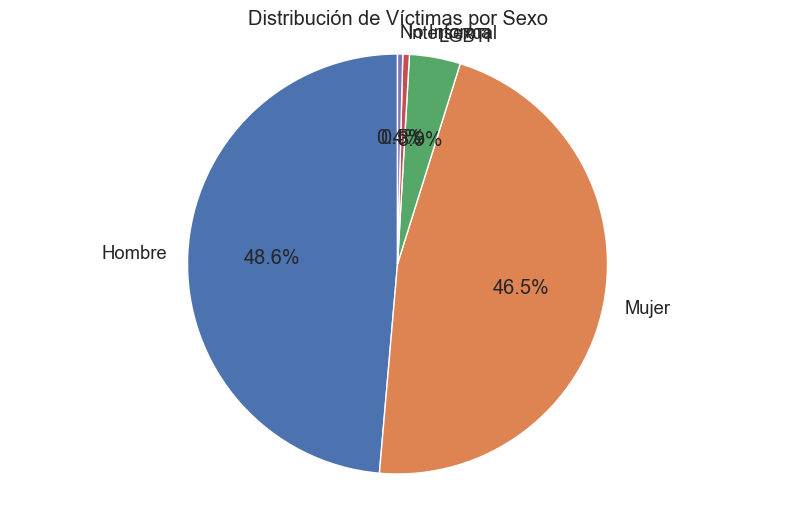

In [13]:
# Analizar la distribución por sexo
if df is not None:
    # Contar frecuencia por sexo
    sexo_count = df['SEXO'].value_counts()
    
    # Calcular porcentaje
    sexo_percent = (sexo_count / len(df)) * 100
    
    # Crear DataFrame con la información
    sexo_df = pd.DataFrame({
        'Frecuencia': sexo_count,
        'Porcentaje (%)': sexo_percent
    })
    
    print("Distribución de Víctimas por Sexo:")
    display(sexo_df)
    
    # Visualizar distribución por sexo
    plt.figure(figsize=(10, 6))
    plt.pie(sexo_count, labels=sexo_count.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Víctimas por Sexo')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()
else:
    print("No se puede analizar la distribución por sexo porque el dataset no se cargó correctamente.")

## Distribución por Ciclo Vital

Analizamos la distribución de víctimas por ciclo vital (edad).

Distribución de Víctimas por Ciclo Vital:


,Frecuencia,Porcentaje (%)
CICLO_VITAL,,
entre 29 y 60,645780,25.881897
entre 61 y 100,487518,19.538993
entre 18 y 28,445116,17.839584
entre 12 y 17,240797,9.650784
entre 29 y 59,169113,6.777796
entre 6 y 11,159329,6.385668
ND,137868,5.525543
entre 60 y 110,132327,5.303468
entre 0 y 5,77255,3.096265


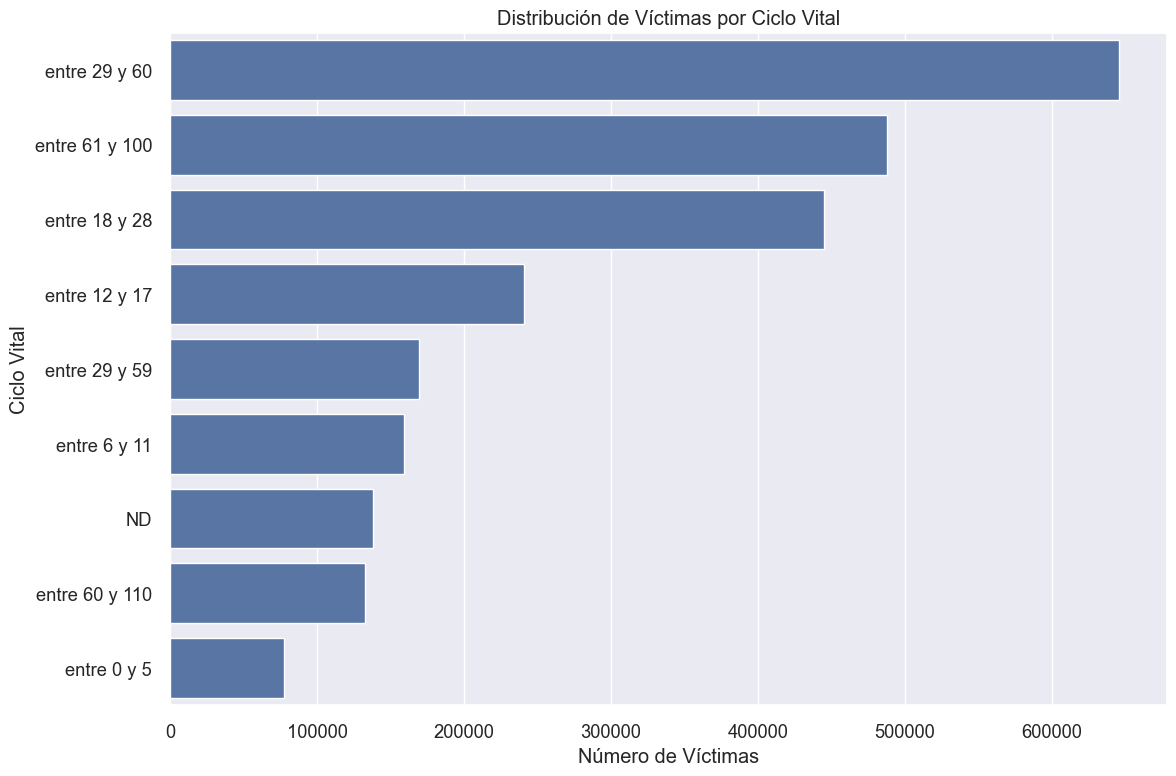

In [12]:
# Analizar la distribución por ciclo vital
if df is not None:
    # Contar frecuencia por ciclo vital
    ciclo_count = df['CICLO_VITAL'].value_counts()
    
    # Calcular porcentaje
    ciclo_percent = (ciclo_count / len(df)) * 100
    
    # Crear DataFrame con la información
    ciclo_df = pd.DataFrame({
        'Frecuencia': ciclo_count,
        'Porcentaje (%)': ciclo_percent
    })
    
    print("Distribución de Víctimas por Ciclo Vital:")
    display(ciclo_df)
    
    # Visualizar distribución por ciclo vital
    plt.figure(figsize=(12, 8))
    sns.barplot(x=ciclo_count.values, y=ciclo_count.index)
    plt.title('Distribución de Víctimas por Ciclo Vital')
    plt.xlabel('Número de Víctimas')
    plt.ylabel('Ciclo Vital')
    plt.tight_layout()
    plt.show()
else:
    print("No se puede analizar la distribución por ciclo vital porque el dataset no se cargó correctamente.")

## Conclusiones

Resumen de los hallazgos principales del análisis exploratorio.

Después de realizar el análisis exploratorio del dataset de víctimas del conflicto armado en Colombia, podemos destacar los siguientes hallazgos:

1. El dataset contiene información sobre diferentes tipos de hechos victimizantes, con el desplazamiento forzado como el más frecuente.
2. La distribución geográfica muestra que algunos departamentos han sido más afectados que otros por el conflicto armado.
3. Existe una diferencia en la distribución por sexo, lo que indica un impacto diferenciado del conflicto.
4. La distribución por ciclo vital muestra cómo el conflicto ha afectado a diferentes grupos de edad.

Este análisis exploratorio proporciona una base para investigaciones más profundas sobre el impacto del conflicto armado en Colombia.